2) Build a prediction model for Salary_hike
Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
# import dataset
df=pd.read_csv('C:/Users\ganes\Desktop\DS\Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA and Data visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

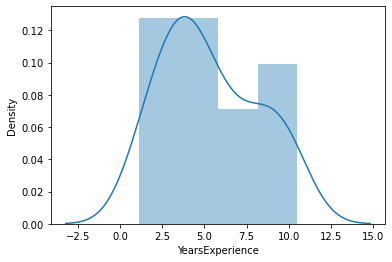

In [5]:
sns.distplot(df['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

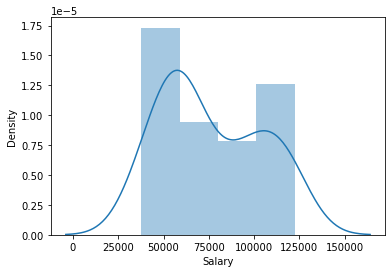

In [7]:
sns.distplot(df['Salary'])

# Feature Engineering

In [26]:
df=df.rename({'YearsExperience':'years_experience', 'Salary':'salary'},axis=1)
df

,years_experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# Correlation analysis

In [27]:
df.corr()

,years_experience,salary
years_experience,1.000000,0.978242
salary,0.978242,1.000000


<AxesSubplot:xlabel='years_experience', ylabel='salary'>

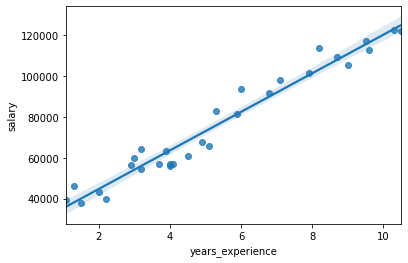

In [28]:
sns.regplot(x=df['years_experience'],y=df['salary'])

# Model building

In [34]:
model=smf.ols('salary~years_experience',data=df).fit()

# Model Testing

In [35]:
# Finding Cefficient Parameters
model.params

Intercept           25792.200199
years_experience     9449.962321
dtype: float64

In [36]:
# Finding Pvalues and tvalues
model.tvalues,model.pvalues

(Intercept           11.346940
 years_experience    24.950094
 dtype: float64,
 Intercept           5.511950e-12
 years_experience    1.143068e-20
 dtype: float64)

In [38]:
# Finding Rsquared values
model.rsquared, model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

# Model Predictions

In [40]:
# Manual prediction for say 4 years Experience
Salary=( 25792.200199)+(9449.962321)*4
Salary

63592.049483

In [42]:
# Automatic Prediction for say 4 & 7 Years Experience
new_data=pd.Series([4,7])
new_data

0    4
1    7
dtype: int64

In [49]:
data_pred=pd.DataFrame(new_data,columns=['years_experience'])
data_pred

,years_experience
0,4
1,7


In [50]:
model.predict(data_pred)

0    63592.049484
1    91941.936449
dtype: float64